# Sect 25-Pt 1: Intro to Logistic Regression 

- online-ds-pt-041320
- 08/28/20

## Questions?

## Announcements

- **Sect 25 will be split into 2 study groups.**
- **Sect 26 doesn't introduce much/anything new**
    - It revisits gradient descent and applies it to Logistic Regression.
    - **We will discuss** some of the concepts re-introduced next study group.
    - **We will NOT have an entire study group** dedicated to section 26

## Topics in Sect 25

- For Today:
    - Supervised vs Unsupervised Learning
    - Logistic Regression
    - Evaluating Classifiers (part 1):
        - Confusion Matrices


- For Thursday:
    - Evaluating Classifiers (part 2)
    - Class Imbalance Problems

# Types of Machine Learning Models

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/ai_machine_learning_deep_learning.png">

## Intro to Supervised Learning

> "The term **_Supervised Learning_** refers to a class of machine learning algorithms that can "learn" a task through **_labeled training data_**."

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-intro-to-supervised-learning-v2-1-online-ds-pt-100719/master/images/new_ml-hierarchy.png" width=60%>

# From Linear Regression to Logistic Regression


<img src="https://raw.githubusercontent.com/jirvingphd/online-dtsc-pt-041320-cohort-notes/master/assets/images/logistic_vs_linear.jpg">

## How is it used?

### Linear Regression

Trying to find the **relationship** and predict a specific value.

- Examples of regressions:
    - House prices
    - Salary
    - Reviews/Ratings

### Classification

Trying to identify what features can predict which class a particular observation/row belongs to.
- Can be a "binary classification" 
    - "yes" or "no"
    - Survived or died.
    - Diabetic or not-diabetic
- Can also be a "multiclass classification"
    - Which type of flower?
    - Will a football game end one team winning, or the other team, or a tie?


## Recall Linear Regression

### Formula

$$ \large \hat y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n = \sum_{i=0}^{N} \beta_i x_i $$

- Output is specifying the **predicted value** for the target

## Classification: Use Logistic Regression

- Output is specifying the **probability** of belonging to a particular group

- Visual Example:
    - https://www.desmos.com/calculator/y2ilpxiqys

Transform from linear regression!

$$ \large \hat y = \sum_{i=0}^{N} \beta_i x_i $$

$$\large P = \displaystyle \frac{1}{1+e^{-\hat y}} = \frac{1}{1+e^{-\sum_{i=0}^{N} \beta_i x_i}} $$

$$ \large = \frac{1}{1+e^{-\beta_0}e^{-\beta_1 x_1}\ldots e^{-\beta_N x_N}} $$

# Implementing Logistic Regression

## Functions from Last Class

In [64]:
# !pip install fsds
from fsds.imports import *

In [65]:
def remake_df(array,df):
    return pd.DataFrame(array, columns=df.columns, index=df.index)


def fit_evaluate_model(linreg,X_train_sca, X_test_sca, y_train, y_test):
    linreg.fit(X_train_sca, y_train)

    y_hat_train = linreg.predict(X_train_sca)
    y_hat_test = linreg.predict(X_test_sca)

#     results = {'train-R2':metrics.r2_score(y_train, y_hat_train),
#                 'test-R2':metrics.r2_score(y_test, y_hat_test),
#               'train-RMSE':np.sqrt(metrics.mean_squared_error(y_train,
#                                                               y_hat_train)),
#               'test-RMSE':np.sqrt(metrics.mean_squared_error(y_test,
#                                                               y_hat_test))}
#     display(pd.Series(results))

    return linreg

def get_model_coeffs(X_df, sklearn_model=None, ols_model = None):
    
    coeffs_df = pd.DataFrame()
    
    if sklearn_model is not None:

        coeffs = dict(zip(X_df.columns,sklearn_model.coef_))
        coeffs['const'] = sklearn_model.intercept_

        coeffs_df = pd.DataFrame(coeffs,index=['sklearn']).T

    if ols_model is not None:
        coeffs_df = coeffs_df.join(ols_model.params.rename('statsmodels'))
        coeffs_df = coeffs_df.join(ols_model.pvalues.rename('p-values').round(4))
        
    return coeffs_df

#### Predict Passenger Survival on Titanic

In [66]:
df = fs.datasets.load_titanic(read_csv_kwds={'index_col':0})
df.set_index('PassengerId',inplace=True)
df.drop(['Name','Ticket','Cabin','Parch'],inplace=True,axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
PassengerId,,,,,,,
1,0,3,male,22.0,1,7.2500,S
2,1,1,female,38.0,1,71.2833,C
3,1,3,female,26.0,0,7.9250,S
4,1,1,female,35.0,1,53.1000,S
5,0,3,male,35.0,0,8.0500,S


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 55.7+ KB


In [68]:
# Recast Number Cols
df['Pclass'] = pd.to_numeric(df['Pclass'],errors='coerce')

In [69]:
df['Survived'].value_counts(normalize=True,dropna=False)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

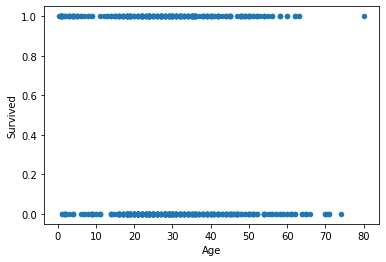

In [70]:
df.plot('Age','Survived',kind='scatter');

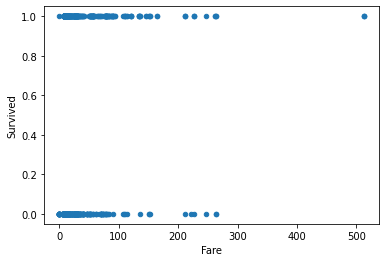

In [71]:
df.plot('Fare','Survived',kind='scatter');

### Q: What are the preprocessing steps I need to perform before I create the model?

- Fill/drop in missing/null values
- Feature Selection / Feature Engineering (interaction terms)
- Handling categorial variables
    - One Hot Encoding 
    - Label Encoding
- Handling Outliers (maybe apply today)
- Normalizing/Standardizing our data

- **Multicollinearity (does it still matter as much for Logistic?)**

- Train-test-split


### A: 

- Address null values
- Encode categorical data
- Train-test-split
- Train Model with train data
- Evaluate Model with test data

### Preprocessing

In [72]:
## Null Values
df.isna().sum()

Survived      0
Pclass       49
Sex           0
Age         177
SibSp         0
Fare          0
Embarked      2
dtype: int64

In [73]:
target = 'Survived'
X = df.drop(columns=[target])
y = df[target]
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [74]:
cat_cols = X.select_dtypes('O').columns
cat_cols

Index(['Sex', 'Embarked'], dtype='object')

In [75]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)
X_train.shape, y_test.shape

((712, 6), (179,))

In [76]:
from sklearn.impute import SimpleImputer

In [77]:
cat_cols = X_train.select_dtypes('O').columns
cat_cols

Index(['Sex', 'Embarked'], dtype='object')

In [79]:
num_cols = X_train.select_dtypes('number').columns
num_cols

Index(['Pclass', 'Age', 'SibSp', 'Fare'], dtype='object')

In [80]:
X_train[cat_cols].isna().sum()

Sex         0
Embarked    2
dtype: int64

In [81]:
imputer_num = SimpleImputer(strategy='median')
X_train.dropna(subset=cat_cols,inplace=True)
X_test.dropna(subset=cat_cols,inplace=True)
# imputer_cat = SimpleImputer(strategy='most_frequent')#,fill_value='missing')

X_train[num_cols] = imputer_num.fit_transform(X_train[num_cols])
X_test[num_cols] = imputer_num.transform(X_test[num_cols])

X_train[cat_cols] = imputer_cat.fit_transform(X_train[cat_cols])
X_test[cat_cols] = imputer_cat.transform(X_test[cat_cols])

# df['Age'] = imputer.fit_transform(df[['Age']])


In [82]:
X_train.isna().sum(), X_test.isna().sum()

(Pclass      0
 Sex         0
 Age         0
 SibSp       0
 Fare        0
 Embarked    0
 dtype: int64,
 Pclass      0
 Sex         0
 Age         0
 SibSp       0
 Fare        0
 Embarked    0
 dtype: int64)

In [83]:
X_train

,Pclass,Sex,Age,SibSp,Fare,Embarked
PassengerId,,,,,,
332,1.0,male,45.5,0.0,28.5000,S
734,2.0,male,23.0,0.0,13.0000,S
383,3.0,male,32.0,0.0,7.9250,S
705,3.0,male,26.0,1.0,7.8542,S
814,3.0,female,6.0,4.0,31.2750,S
...,...,...,...,...,...,...
107,3.0,female,21.0,0.0,7.6500,S
271,1.0,male,28.0,0.0,31.0000,S
861,3.0,male,41.0,2.0,14.1083,S


In [84]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False,drop='first')#,handle_unknown='ignore')

X_train_ohe = X_train.drop(columns=cat_cols).copy()
X_test_ohe = X_test.drop(columns=cat_cols).copy()


encoder.fit(X_train[cat_cols])

X_train_ohe[encoder.get_feature_names(cat_cols)] = encoder.transform(X_train[cat_cols])
X_test_ohe[encoder.get_feature_names(cat_cols)] = encoder.transform(X_test[cat_cols])

X_train_ohe

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,
332,1.0,45.5,0.0,28.5000,1.0,0.0,1.0
734,2.0,23.0,0.0,13.0000,1.0,0.0,1.0
383,3.0,32.0,0.0,7.9250,1.0,0.0,1.0
705,3.0,26.0,1.0,7.8542,1.0,0.0,1.0
814,3.0,6.0,4.0,31.2750,0.0,0.0,1.0
...,...,...,...,...,...,...,...
107,3.0,21.0,0.0,7.6500,0.0,0.0,1.0
271,1.0,28.0,0.0,31.0000,1.0,0.0,1.0
861,3.0,41.0,2.0,14.1083,1.0,0.0,1.0


In [85]:
## Scale data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler= StandardScaler()

X_train_sca = X_train_ohe.copy()
X_test_sca = X_test_ohe.copy()


X_train_sca[num_cols] = scaler.fit_transform(X_train_sca[num_cols])
X_test_sca[num_cols] = scaler.transform(X_test_sca[num_cols])

In [86]:
X_train_sca.describe().round(2)

,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
count,710.00,710.00,710.00,710.00,710.00,710.00,710.00
mean,-0.00,0.00,-0.00,0.00,0.66,0.08,0.74
std,1.00,1.00,1.00,1.00,0.47,0.28,0.44
min,-1.71,-2.22,-0.47,-0.62,0.00,0.00,0.00
25%,-0.48,-0.55,-0.47,-0.47,0.00,0.00,0.00
50%,0.76,-0.09,-0.47,-0.35,1.00,0.00,1.00
75%,0.76,0.45,0.38,-0.04,1.00,0.00,1.00
max,0.76,3.93,6.33,9.24,1.00,1.00,1.00


## Fitting a Logistic Regression with `statsmodels`

In [87]:
import statsmodels.api as sm

In [88]:
X_train_sms = sm.add_constant(X_train_sca)
X_test_sms = sm.add_constant(X_test_sca)
X_train_sms

,const,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
332,1.0,-1.712583,1.262456,-0.471532,-0.076094,1.0,0.0,1.0
734,1.0,-0.475621,-0.474396,-0.471532,-0.374487,1.0,0.0,1.0
383,1.0,0.761341,0.220345,-0.471532,-0.472186,1.0,0.0,1.0
705,1.0,0.761341,-0.242816,0.378183,-0.473549,1.0,0.0,1.0
814,1.0,0.761341,-1.786684,2.927329,-0.022672,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
107,1.0,0.761341,-0.628783,-0.471532,-0.477480,0.0,0.0,1.0
271,1.0,-1.712583,-0.088429,-0.471532,-0.027966,1.0,0.0,1.0
861,1.0,0.761341,0.915086,1.227898,-0.353151,1.0,0.0,1.0


In [89]:
logit = sm.Logit(y_train,X_train_sms)
logit.fit?

ValueError: The indices for endog and exog are not aligned

In [90]:
# sm.Logit(y_train,X_train_sms).fit

In [92]:
result  = logit.fit()#maxiter=1000)
result.summary()

         Current function value: 0.461619
         Iterations: 35


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Thu, 27 Aug 2020   Pseudo R-squ.:                  0.3030
Time:                        21:49:23   Log-Likelihood:                -328.67
converged:                      False   LL-Null:                       -471.54
Covariance Type:            nonrobust   LLR p-value:                 4.455e-57
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.1351      0.477      6.569      0.000       2.200       4.071
Pclass              -1.4121      0.302     -4.678      0.000      -2.004      -0.820
Age                 -1.9305      0.665     -2.901      0.004      -3.235      -0.626
SibSp               -2.7800      0.867     -3.207      0.001      -4.479      -1.081
Fare                 2.2866      1.349      1.695      0.090      -0.358       4.931
Sex_male            -2.6203      0.210    -12.468      0.000      -3.032      -2.208
Embarked_Q          -0.2617      0.423     -0.619      0.536      -1.090       0.566
Embarked_S          -0.4439      0.264     -1.680      0.093      -0.962       0.074
Embarked_missing    18.7299   1.75e+04      0.001      0.999   -3.42e+04    3.43e+04
====================================================================================
"""


## Fitting a Logistic Regression with `sklearn`

In [25]:
from sklearn.linear_model import LogisticRegression#LinearRegression

In [26]:
# help(LogisticRegression)

In [27]:
## Fit a logistic regression model with defaults
def 

SyntaxError: invalid syntax (<ipython-input-27-a0db4e2d97ff>, line 2)

In [ ]:
logreg = LogisticRegression(C=1e5, solver='liblinear')
logreg.fit(X_train_sca, y_train)

y_hat_test = logreg.predict(X_test_sca)

In [ ]:
## Fit a logistic regression with params from lab/lessons

In [ ]:
# logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear',
#                            max_iter=1000)

# Evaluating Predictions - Confusion Matrix

- A **confusion matrix** separates our predictions into 4 types of outcomes (for a binary classification):
    - **_True Positives (TP)_**: The number of observations where the model predicted the person has the disease (1), and they actually do have the disease (1).

    - **_True Negatives (TN)_**: The number of observations where the model predicted the person is healthy (0), and they are actually healthy (0).

    - **_False Positives (FP)_**: The number of observations where the model predicted the person has the disease (1), but they are actually healthy (0). 

    - **_False Negatives (FN)_**: The number of observations where the model predicted the person is healthy (0), but they actually have the disease (1).

    <img src="https://raw.githubusercontent.com/learn-co-students/dsc-visualizing-confusion-matrices-lab-online-ds-ft-100719/master/images/new_confusion_matrix_2.png" width=50%>

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_hat_test)

In [ ]:
## get confusion matrix
cm = confusion_matrix(y_test,y_hat_test)
cm

In [ ]:
cm[0].sum()

In [ ]:
cm.sum(axis=1)

In [ ]:
cm_norm = cm / cm.sum(axis=1)[:,np.newaxis]
cm_norm

In [ ]:
plot_confusion_matrix(regr,X_test,y_test,cmap='Blues')

In [ ]:
plot_confusion_matrix(regr,X_test,y_test,cmap='Blues',normalize='true')

In [ ]:
## COMPARED NOT-SCALED DATA
regr = LogisticRegression(C=1e5, solver='liblinear')
regr.fit(X_train, y_train)

y_hat_test = regr.predict(X_test)

### Visualizing Confusion Matrices

In [ ]:
# Here we iterate through the confusion matrix and append labels to our visualization 
def plot_cm(cnf_matrix,thresh=0.5):
    import itertools
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.xticks(ticks=[0,1],labels=['Died','Survived'])
    plt.yticks(ticks=[0,1],labels=['Died','Survived'])

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')
    plt.colorbar()
    
#     acc = accuracy_score(y_test,/.predict(X_test))
#     plt.title(f"Confusion Matrix (overall acc={round(acc,2)})")
    plt.show()

In [ ]:

plot_cm(cm_norm.round(3))

In [ ]:
# ## Sklearn Now has a plot_confusion_matrix function (if update)
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_test,y_hat_test)
cm_norm = cm / cm.sum(axis=1)[:,np.newaxis]
print(accuracy_score(y_test,y_hat_test))
plot_cm(cm_norm.round(3))

In [ ]:
regr = LogisticRegression()#C=1e5, solver='liblinear')
regr.fit(X_train_sca, y_train)

y_hat_test = regr.predict(X_test_sca)

cm = confusion_matrix(y_test,y_hat_test)
cm_norm = cm / cm.sum(axis=1)[:,np.newaxis]
print(accuracy_score(y_test,y_hat_test))
plot_cm(cm_norm.round(3))

### Other Metrics for Classification

- We will be discussing the other evaluation matrix for classifications on Thursday

# END OF STUDY GROUP 

# Fit a Logistic Regression with statsmodels

- From [Fitting a Logistic Regression Lab](https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-25-introduction-to-logistic-regression/fitting-a-logistic-regression-model-lab)

> "Now with everything in place, you can build a logistic regression model using `statsmodels` (make sure you create an intercept term as we showed in the previous lesson).  "
>> Warning: Did you receive an error of the form "LinAlgError: Singular matrix"? This means that `statsmodels` was unable to fit the model due to certain linear algebra computational problems. Specifically, the matrix was not invertible due to not being full rank. In other words, there was a lot of redundant, superfluous data. Try removing some features from the model and running it again.

In [ ]:
# Build a logistic regression model using statsmodels
import statsmodels.api as sm
X_train_sca = sm.tools.add_constant(X_train_sca)
X_test_sca = sm.tools.add_constant(X_test_sca)

In [ ]:
logit_model = sm.Logit(y_train, X_train_sca)
result = logit_model.fit()

In [ ]:
X_train_sca.columns

In [ ]:
sm_cols = [col for col in X_train_sca.columns if "Cabin" not in col]
sm_cols.remove('Pclass_?')

In [ ]:
 X_train_sca[sm_cols].head()

In [ ]:
logit_model = sm.Logit(y_train, X_train_sca[sm_cols])
result = logit_model.fit()
result.summary()

In [ ]:
logit_model = sm.Logit(y, sm.add_constant(X)[sm_cols])
result = logit_model.fit()
result.summary()

In [ ]:
# result.pred_table()

In [ ]:
y_hat_test = result.predict(X_test_sca[sm_cols])
y_hat_test

In [ ]:
pred_survived = y_hat_test>=0.5
pred_survived.astype(int)

In [ ]:
cm = confusion_matrix(y_test,pred_survived.astype(int))
cm

In [ ]:
(88+17)

In [ ]:
np.sum(cm[0])

In [ ]:
np.sum(cm,axis=1)

In [ ]:
cm_norm = cm/np.sum(cm,axis=1)
cm_norm

In [ ]:
# Here we iterate through the confusion matrix and append labels to our visualization 
def plot_cm(cnf_matrix,thresh=0.5):
    import itertools
#     thresh=0.5
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.xticks(ticks=[0,1],labels=['Died','Survived'])
    plt.yticks(ticks=[0,1],labels=['Died','Survived'])

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')
    plt.colorbar()
    plt.show()
    
    

In [ ]:
plot_cm(cm,thresh=40)

In [ ]:

plot_cm(cm_norm.round(2))

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_log,X_test,y_test,normalize='true',cmap='Blues')